In order to successfully complete this assignment you must follow all instructions in this notebook and upload your files with your answers on or before **11:59pm on Friday April 12th**.

In [30]:
from numpy import *
import matplotlib.pyplot as plt

# Homework 5: The Rumor Mill

In this homework we will modify a serial code to run across nodes using MPI.


### Goals for this assignment:

By the end of this assignment, you should be able to:

* Benchmark The Rumor Mill
* Time the individual components
* MPIodify the simulation
* Output Visualization
* Scaling Study
* Homework Report

<img src="https://farm6.staticflickr.com/5182/5766506970_64806a7180_b.jpg" width="90%" alt="animated gif">


----

# 1. Benchmark



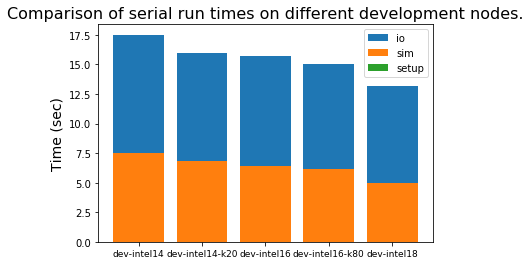

In [39]:
pos = [0,1,2,3,4]
nodes = array(["dev-intel14","dev-intel14-k20","dev-intel16","dev-intel16-k80","dev-intel18"])
setup = array([.007150,.006430,.006241,.005857,.005269])
io = array([10.011658,9.155321,9.260149,8.880008,8.144611])
sim = array([7.492912,6.816197, 6.440544,6.137684,4.991301])
plt.bar(pos, setup+sim+io, label="io")
plt.bar(pos, setup+sim, label="sim")
plt.bar(pos, setup, label="setup")
plt.legend()
plt.xticks(pos, nodes, fontsize=9);
plt.title("Comparison of serial run times on different development nodes.", fontsize=16)
plt.ylabel("Time (sec)", fontsize=14);

IO time is the biggest problem, but cannot really be cut down using MPI. However, we should theoretically be able to lower the simulation time drastically on MPI for very large jobs.

# 2. Scaling Study

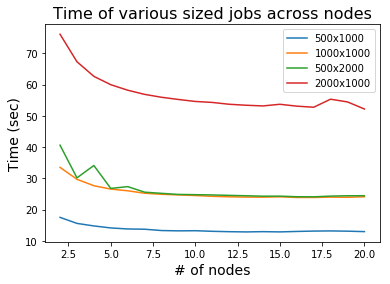

In [52]:
n = arange(2,21)
plt.plot(n, [17.527720, 15.596814, 14.782426, 14.142756, 13.815245, 13.732062, 13.311383, 13.210196, 13.255438, 13.064612, 12.944040, 12.870374, 12.953392, 12.875652, 13.020724, 13.137204, 13.188931, 13.105833, 12.968761], label="500x1000")
plt.plot(n, [33.523430, 29.712682, 27.652323, 26.578921, 26.033816, 25.248833, 24.912104, 24.707150, 24.517667, 24.266023, 24.103205, 24.019054, 23.989916, 24.099237, 23.890346, 23.899721, 24.006102, 23.955194, 24.116819], label="1000x1000")
plt.plot(n, [40.630046,
 30.171190, 34.124564, 26.795182, 27.362646, 25.592520, 25.213637, 24.869787, 24.786606,
 24.699864, 24.565262, 24.442290, 24.304691, 24.317981, 24.129677, 24.104111, 24.328256,
 24.443593, 24.443016,], label="500x2000")
plt.plot(n, [76.129409,
 67.329513, 62.658931, 59.982883, 58.223247, 56.890116, 55.959352, 55.254000, 54.623988,
 54.308986, 53.722850, 53.410044, 53.188017, 53.714352, 53.119048, 52.769653, 55.341133,
 54.471557, 52.200880,], label="2000x1000")
plt.legend()
plt.ylabel("Time (sec)", fontsize=14)
plt.xlabel("# of nodes", fontsize=14)
plt.title("Time of various sized jobs across nodes", fontsize=16);

The job approaches a time limit very quickly in relation to the number of nodes. This is because I coded it badly. I shouldn't have had the full board output handled outside of the MPI section of code.

# 3. Homework Report

The program is essentially an agent based model which simulates the spread of rumors, with connected borders and not allowing the rumors to overlap. My goal was to parallize it over MPI, but do the way I coded it, it ended up being slower than serial, but it is very paralized so I didn't redo it.

I used the HPCC and all parallel timing studies were conducted on the HPCC.

The serial simulation finishes in about 13 seconds on dev-intel18, and the most ideal MPI versions of it sometimes approach the serial speed. 

It would be faster if I didn't code in the combination of the whole board in the code, because I am essentially passing a whole boards worth of information around the network every 10 iterations, which slows down the code a lot. Ideally, I should have combined each of the boards at the end, which would have been much faster. This would be done by essentially keeping pictures of the individual sections of the boards, and combining them after running them all with something like ImageMagick.

It is very easy to pepare and run on the HPCC. You should only need to load the module Libpng, and then simply make clean, make inside the file directory. Print statements are commented out in the code, and can be easilly added. There is also the submission script I used for parallel study, called scalerun.sb. You can sbatch that, and if it should run the parallel simulation across 2 through 20 nodes, and record the times in a file. You can adjust the size of the board by changing the XX and YY variables at the beginning of the main function inside the parallel code, called par_rumor_mill.c. 

----

### Turning in your homework

Now, you need to submit this assignment by uploading your files to the course Desire2Learn web page. Make sure you include your report and source code so the instructor can reproduce your results. 

&#169; Copyright 2019,  Michigan State University Board of Trustees